In [ ]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from PIL import Image
from scipy import ndimage
import os
from sklearn.preprocessing import LabelEncoder

In [31]:
base_path = "./cat-bunny/train-cat-rabbit"

def load_category(cat):
    X = []
    y = []
    path = os.path.join(base_path, cat)

    # Cargamos todas las imagenes
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)

        try:
            # Cargamos y reducimos tamaño
            img = Image.open(img_path).convert("RGB")
            img = img.resize((64, 64))
            # Pasamos a numpy y añadimos a lista y su categoria
            X.append(np.array(img))

            if cat == "cat":
                y.append(1)
            else:
                y.append(0)

        except Exception as e:
            print(f"[Error] Falló la carga. {e} ")

    # Pasamos a categorico

    return np.array(X), np.array(y)

# Cargamos las imagenes.
X_train = []; y_train = []
for cat in ["cat", "rabbit"]:
    X, y = load_category(cat)
    X_train.append(X); y_train.append(y)

X_train = np.vstack([X_train[0], X_train[1]])
y_train = np.hstack([y_train[0], y_train[1]])


print(f"data shape: {np.array(X_train).shape}")
print(f"Labels shape: {np.array(y_train).shape}")

data shape: (1600, 64, 64, 3)
Labels shape: (1600,)


In [32]:
np.unique(y_train)

array([0, 1])

In [33]:
# Cargamos los otros datasets
X_test = []; y_test = [];
for cat in ["cat", "rabbit"]:
    base_path = "./cat-bunny/train-cat-rabbit/"
    X, y = load_category(cat)
    X_test.append(X); y_test.append(y)

X_test = np.vstack([X_test[0], X_test[1]])
y_test = np.hstack([y_test[0], y_test[1]])


X_val = []; y_val = []
for cat in ["cat", "rabbit"]:
    base_path = "./cat-bunny/val-cat-rabbit/"
    X, y = load_category(cat)
    X_val.append(X), y_val.append(y)

X_val = np.vstack([X_val[0], X_val[1]])
y_val = np.hstack([y_val[0], y_val[1]])

print("Testing: ", X_test.shape, "labels: ", y_test.shape)
print("Val: ", X_val.shape, "labels: ", y_val.shape)

Testing:  (1600, 64, 64, 3) labels:  (1600,)
Val:  (414, 64, 64, 3) labels:  (414,)


In [34]:
etiquetas = {0:"conejo",
             1:"gato"}

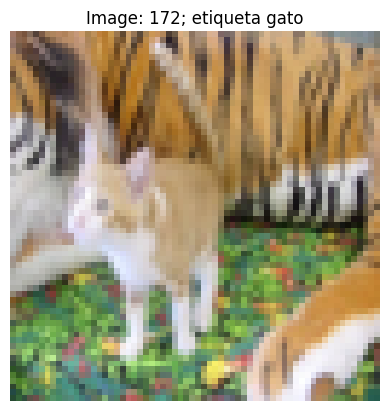

In [35]:
index = np.random.randint(len(X_train))
plt.imshow(X_train[index])
plt.title(f"Image: {index}; etiqueta {etiquetas[y_train[index]]}")
plt.axis(False)
plt.show()

In [36]:
# Aplanando las imagenes.
X_train_f = X_train.reshape(X_train.shape[0], -1).T
y_train_f = y_train.reshape(y_train.shape[0], -1).T # ajustamos a forma vector

print(f"X_train shape: {X_train_f.shape}")
print(f"y_train shape: {y_train_f.shape}")

X_train shape: (12288, 1600)
y_train shape: (1, 1600)


In [37]:
def flatten(vector1, vector2):
    vector1 = vector1.reshape(vector1.shape[0], -1).T
    vector2 = vector2.reshape(vector2.shape[0], -1).T
    return vector1, vector2

X_test_f, y_test_f = flatten(X_test, y_test)
X_val_f, y_val_f = flatten(X_val, y_val)

print(f"""Shapes
      X_test_f: {X_test_f.shape}
      X_val_f: {X_val_f.shape}
      y_test_f: {y_test_f.shape}
      y_val_f: {y_val_f.shape}""")

Shapes
      X_test_f: (12288, 1600)
      X_val_f: (12288, 414)
      y_test_f: (1, 1600)
      y_val_f: (1, 414)


In [38]:
X_test_f  = X_test_f / 255
X_train_f = X_train_f / 255
X_val_f   = X_val_f / 255

X_test_f[0]

array([0.38823529, 0.01960784, 0.17647059, ..., 1.        , 0.52156863,
       0.39215686])

------------

In [39]:
# Creamos la función de activación. Usaremos Sigmoid
def sigmoid(z):
    """Función no líneal para transformar Z.

    Args:
        z: Escalar o arreglo de numpy
    Return:
        a: Sigmoide de z
    """
    # Calculo del sigmoide de Z.

    a = 1 / (1 + np.exp(-z))
    return a


# Probamos la función
sigmoid(np.array([0, 1, 2, 3]))

array([0.5       , 0.73105858, 0.88079708, 0.95257413])

In [40]:
def inicializar_parametros(dim):
    w = np.zeros((dim, 1))
    b = 0.0

    return w, b


# Probamos
dim = 2
w, b = inicializar_parametros(dim)
print(w)
print(b)

[[0.]
 [0.]]
0.0


In [41]:
def fullpropagation(w, b, X, y):
    m = X.shape[1]

    # Propagación hacia adelante
    z = np.dot(w.T, X) + b
    A = sigmoid(z)
    cost = -np.sum(y*np.log(A) + (1-y)*np.log(1-A)) / X.shape[-1]

    # Propagación hacia atrás; derivadas
    dw = np.dot(X, (A - y).T) / X.shape[-1]
    db = np.sum(A - y) / X.shape[-1]

    grads = {"dw": dw,
             "db": db}

    return grads, cost


# Probamos con valores dummy
w =  np.array([[1.], [2]])
b = 1.5
X = np.array([[1, -2, -1.], [3, 0.5, -3.2]])
y = np.array([[1, 1, 0]])

grads, cost = fullpropagation(w, b, X, y)

print(f"""Resultados
      dw: {grads["dw"]}
      db: {grads["db"]}
      cost: {cost}""")

Resultados
      dw: [[ 0.25071532]
 [-0.06604096]]
      db: -0.12500404500439652
      cost: 0.15900537707692405


In [42]:
def optimizar(w, b, X, y, epochs=100, learning_rate=0.009, verbose=False):
    w = copy.deepcopy(w) # Evitamos modificar los originales
    b = copy.deepcopy(b)

    costs = []

    for i in range(epochs):
        # Calculo de gradientes
        grads, cost = fullpropagation(w, b, X, y)

        # Obtenemos los gradientes
        dw = grads["dw"]
        db = grads["db"]

        # Actualizamos los pesos
        w -= learning_rate * dw
        b -= learning_rate * db

        # Almacenamos un historial cada 100 epocas
        if i % 100 == 0:
            costs.append(cost)

            if verbose:
                print(f"Epoca {i+1} --- Costo: {cost:.5f} ")

    params = {"w": w,
              "b": b}
    grads = {"dw": dw,
             "db": db}

    return params, grads, costs


# Probamos
params, grads, costs = optimizar(w, b, X, y, epochs=100, learning_rate=1e-3)
print(f"""Resultados
w: {params["w"]},
b: {params["b"]}
dw: {grads["dw"]},
db: {grads["db"]},
costos: {costs}
      """)

Resultados
w: [[0.97543108]
 [2.00648089]],
b: 1.5122486954807202
dw: [[ 0.24075671]
 [-0.06360005]],
db: -0.12001674170801362,
costos: [np.float64(0.15900537707692405)]
      


In [43]:
def predict(w, b, X):
    m = X.shape[1]

    y_pred = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T, X) + b)

    # Mapeamos las predicciones
    y_pred = np.zeros_like(A) # Todo se clasifica como conejo
    y_pred[A > 0.5] = 1

    return y_pred

# Probamos
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])

print(f"Predicciones: {predict(w, b, X)}")

Predicciones: [[1. 1. 0.]]


In [44]:
def NeuralNetwork(X_train, y_train, X_test, y_test, epochs=2_000, lr=0.5, verbose=False):
    # 1) Inicializamos
    w, b = inicializar_parametros(X_train.shape[0])

    # 2) Descensp del gradiente
    params, grads, costs = optimizar(w, b, X_train, y_train, epochs, lr, verbose)

    # 3) Obtenemos parámetros
    w = params["w"]
    b = params["b"]

    # Realizamos una predicción
    y_pred_train = predict(w, b, X_train)
    y_pred_test = predict(w, b, X_test)

    # Mostramos las métricas del modelo
    if verbose:
        print(f"Exactitud de entrenamiento: {100-np.mean(np.abs(y_pred_train - y_train))*100}")
        print(f"Exactitud de Testing: {      100-np.mean(np.abs(y_pred_test - y_test))*100}")

    # Almacenamos todo
    data = {"costs": costs,
            "y_pred_train": y_pred_train,
            "y_pred_test": y_pred_test,
            "w": w,
            "b": b,
            "learning_rate": lr,
            "epochs": epochs}
    return data


In [45]:
ann = NeuralNetwork(X_train_f, y_train_f, X_test_f, y_test_f, epochs=2_000, lr=5e-3, verbose=True)

Epoca 1 --- Costo: 0.69315 
Epoca 101 --- Costo: 1.04898 
Epoca 201 --- Costo: 0.91663 
Epoca 301 --- Costo: 0.84524 
Epoca 401 --- Costo: 0.79414 
Epoca 501 --- Costo: 0.75319 
Epoca 601 --- Costo: 0.71877 
Epoca 701 --- Costo: 0.68907 
Epoca 801 --- Costo: 0.66296 
Epoca 901 --- Costo: 0.63964 
Epoca 1001 --- Costo: 0.61857 
Epoca 1101 --- Costo: 0.59932 
Epoca 1201 --- Costo: 0.58160 
Epoca 1301 --- Costo: 0.56517 
Epoca 1401 --- Costo: 0.54986 
Epoca 1501 --- Costo: 0.53550 
Epoca 1601 --- Costo: 0.52200 
Epoca 1701 --- Costo: 0.50924 
Epoca 1801 --- Costo: 0.49715 
Epoca 1901 --- Costo: 0.48566 
Exactitud de entrenamiento: 77.5625
Exactitud de Testing: 77.5625


In [46]:
print(f"""Parámetros del modelo
      w: {ann.get("w").shape}
      b: {ann.get("b")}""")

Parámetros del modelo
      w: (12288, 1)
      b: 0.3133670000590784


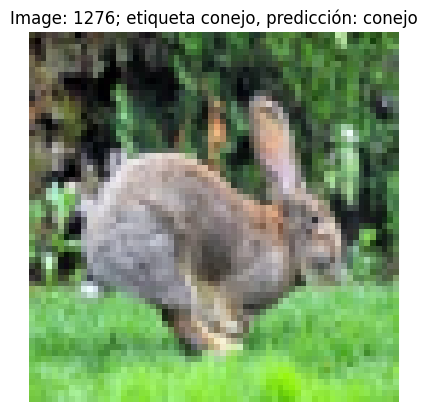

In [47]:
# REalizaremos una inferencia y veremos que nos dice el modelo
index = np.random.randint(len(X_test))
rnd_img = X_test[index]
true_label = y_test[index]
pred_label = ann["y_pred_test"][0, index]

plt.imshow(X_train[index])
plt.title(f"Image: {index}; etiqueta {etiquetas[true_label]}, predicción: {etiquetas[pred_label]}")
plt.axis(False)
plt.show()

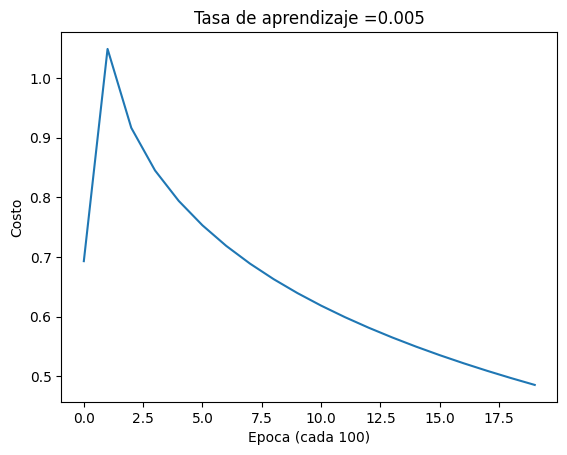

In [48]:
# Observemos la gráfica de costos
costs = np.squeeze(ann["costs"])
plt.plot(costs)
plt.ylabel('Costo')
plt.xlabel('Epoca (cada 100)')
plt.title("Tasa de aprendizaje =" + str(ann["learning_rate"]))
plt.show()